Importa bibliotecas e pacotes necessários

In [75]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

Carrega dataset

In [50]:
data = pd.read_csv("iris.data")
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Filtra as features

In [51]:
features = ["5.1", "3.5", "1.4", "0.2"]
x = data[features]
x


,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


Filtra as labels

In [52]:
y = data["Iris-setosa"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object

Normaliza os dados

In [53]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(x)
normalized_data

array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.38888889, 0.75      ,

In [54]:
normalized_data = pd.DataFrame(normalized_data, columns=x.columns)
normalized_data

,5.1,3.5,1.4,0.2
0,0.166667,0.416667,0.067797,0.041667
1,0.111111,0.500000,0.050847,0.041667
2,0.083333,0.458333,0.084746,0.041667
3,0.194444,0.666667,0.067797,0.041667
4,0.305556,0.791667,0.118644,0.125000
...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667
145,0.555556,0.208333,0.677966,0.750000
146,0.611111,0.416667,0.711864,0.791667
147,0.527778,0.583333,0.745763,0.916667


Divide o data set em 10% para treinamento e 90% para teste

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x, y,
test_size=0.9, random_state=84, stratify=y)

Instancia e treina o modelo

In [56]:
model = LogisticRegression(random_state=0, multi_class='auto', solver='lbfgs')

In [57]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

Calcula a predição para os dados de texto

In [58]:
y_pred = model.predict(x_test)

Plota a matriz de confusão

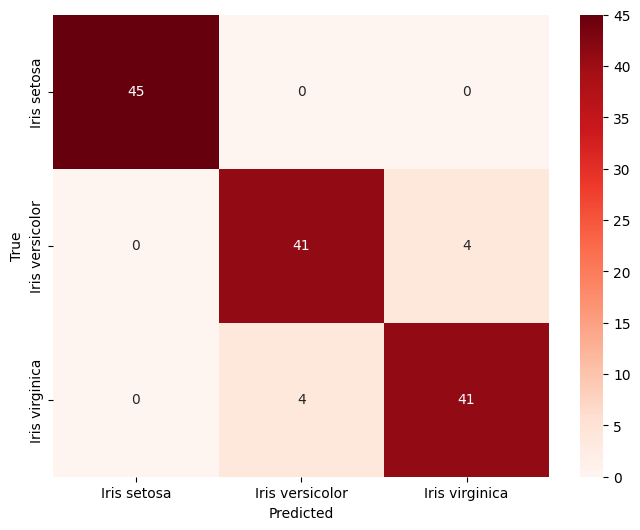

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Iris setosa', 'Iris versicolor', 'Iris virginica'], yticklabels=['Iris setosa', 'Iris versicolor', 'Iris virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Calcula a acuracia, precisão, recall e f1

In [60]:
acc = np.trace(cm) / np.sum(cm)
prec = cm[1, 1] / sum(cm[:, 1])
rec = cm[1, 1] / sum(cm[1, :])
f1 = 2 * (prec * rec) / (prec + rec)

In [61]:
print("Acurácia: {:.2f}".format(acc))
print("Precisão: {:.2f}".format(prec))
print("Recall: {:.2f}".format(rec))
print("F1: {:.2f}".format(f1))

Acurácia: 0.94
Precisão: 0.91
Recall: 0.91
F1: 0.91


Binariza os dados para apenas a classe virginica ser a classe 1

In [71]:
y = y.map({'Iris-virginica': 1, 'Iris-setosa': 0, 'Iris-versicolor': 0})
y

0      0
1      0
2      0
3      0
4      0
      ..
144    1
145    1
146    1
147    1
148    1
Name: Iris-setosa, Length: 149, dtype: int64

Divide os dados

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x, y,
test_size=0.9, random_state=84, stratify=y)

Treina o modelo

In [73]:
model = LogisticRegression(random_state=0, multi_class='auto', solver='lbfgs')

In [74]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

Plota a curva ROC para a classe virginica

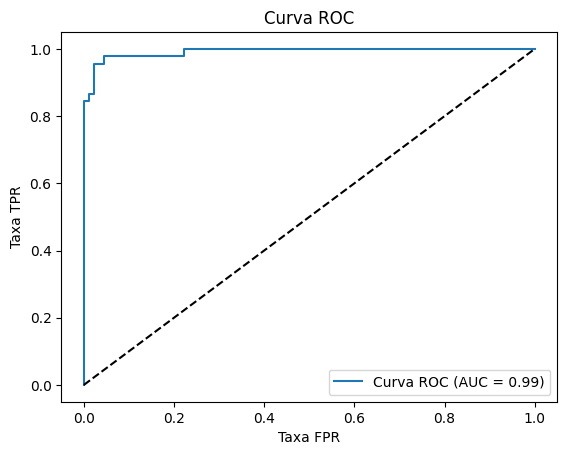

In [76]:
probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
a = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(a))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa FPR')
plt.ylabel('Taxa TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()